In [1]:
onedrive = r"C:\Users\mikek\OneDrive"

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
from pathlib import Path

import shutil

sys.path.append(os.path.join(onedrive,r"Project\python-packages\sdtools"))

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *

%load_ext autoreload
%autoreload 2


print("Done")

Done


In [6]:
mesh = make_new_mesh

Defining dimension z of size 1
>>> Field Nd_src already exists in C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2f4-allsrc_Pi_fix_proper3.nc, it will be overwritten
-> Wrote field Nd_src to C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2f4-allsrc_Pi_fix_proper3.nc
>>> Field Pd_src already exists in C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2f4-allsrc_Pi_fix_proper3.nc, it will be overwritten
-> Wrote field Pd_src to C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2f4-allsrc_Pi_fix_proper3.nc
>>> Field Nd+_src already exists in C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2f4-allsrc_Pi_fix_proper3.nc, it will be overwritten
-> Wrote field Nd+_src to C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2f4-allsrc_Pi_fix_proper3.nc
>>> Field Pd+_src already exists in C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2f4-allsrc_Pi_fix_proper3.nc,

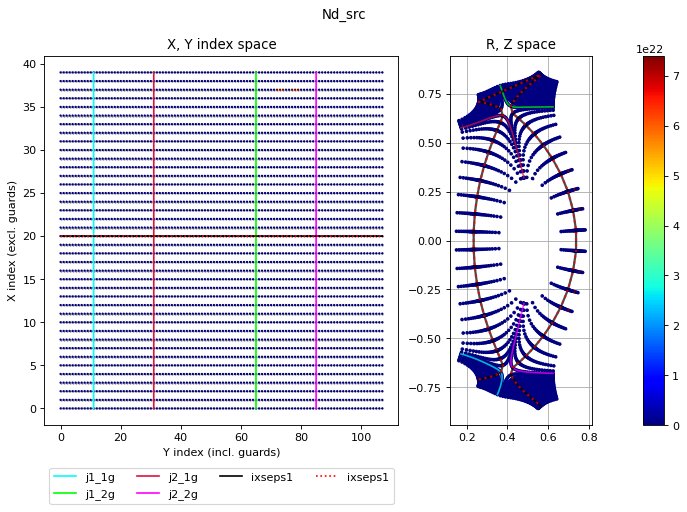

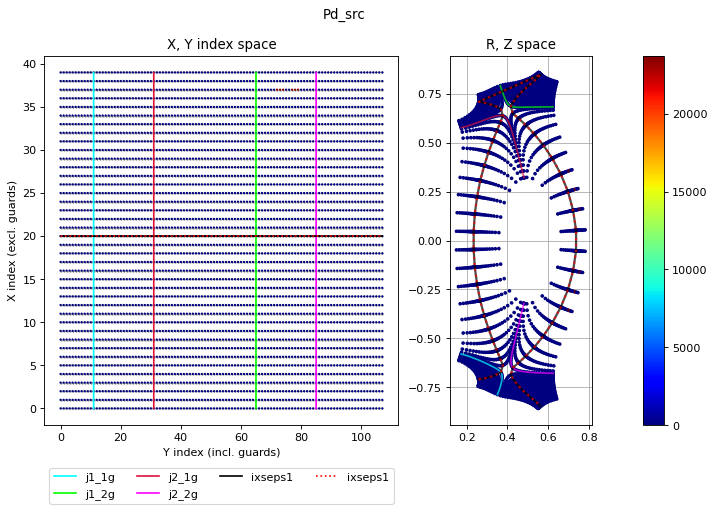

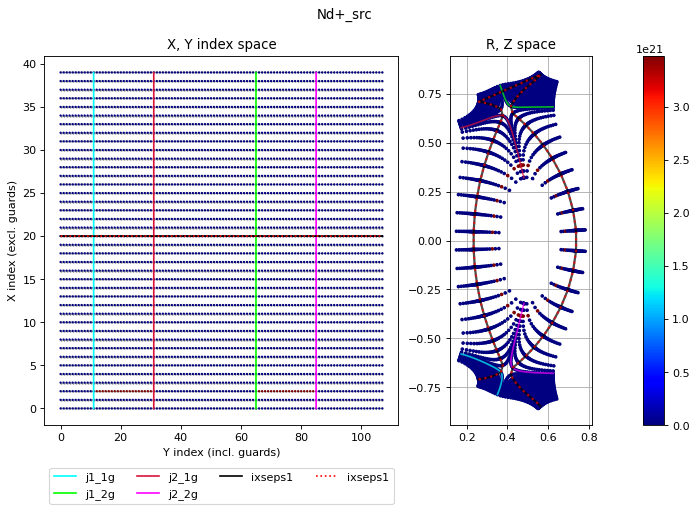

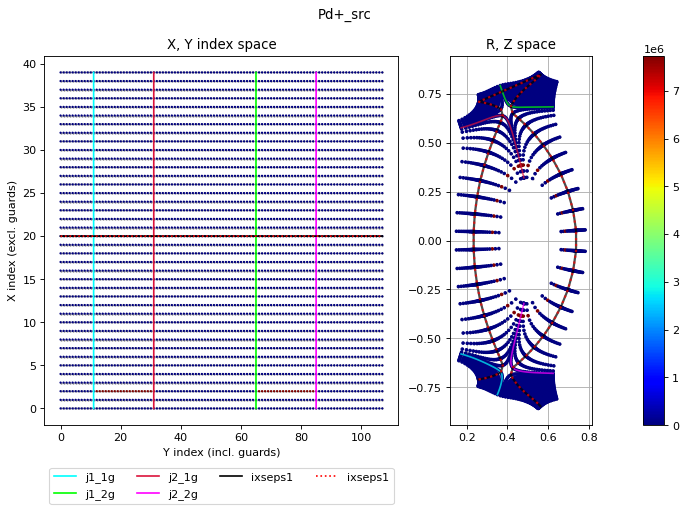

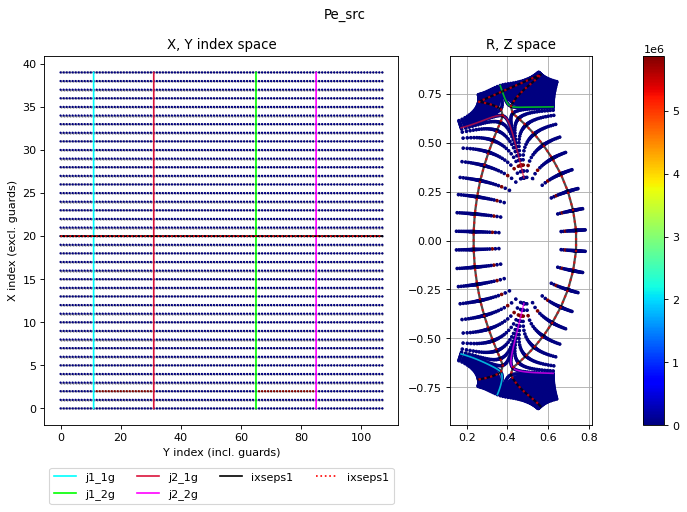

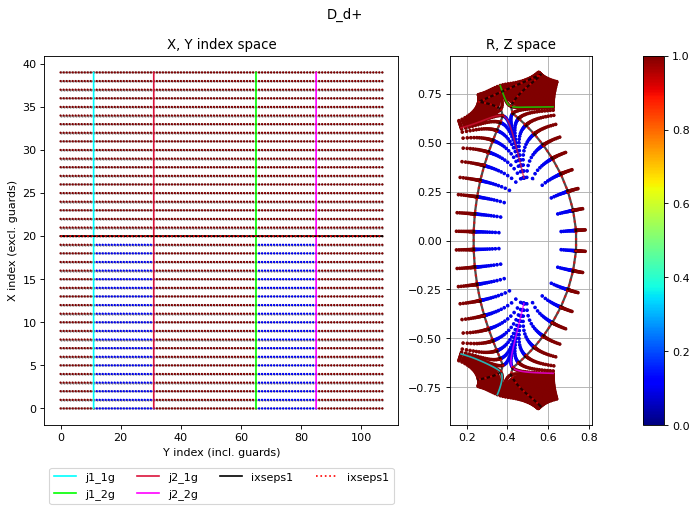

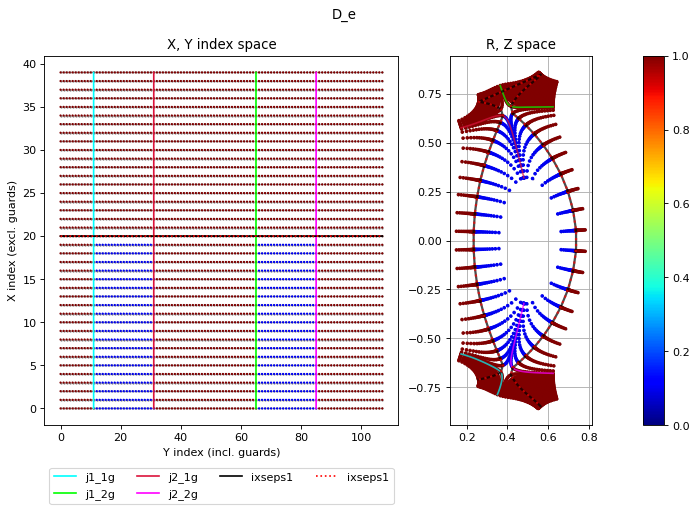

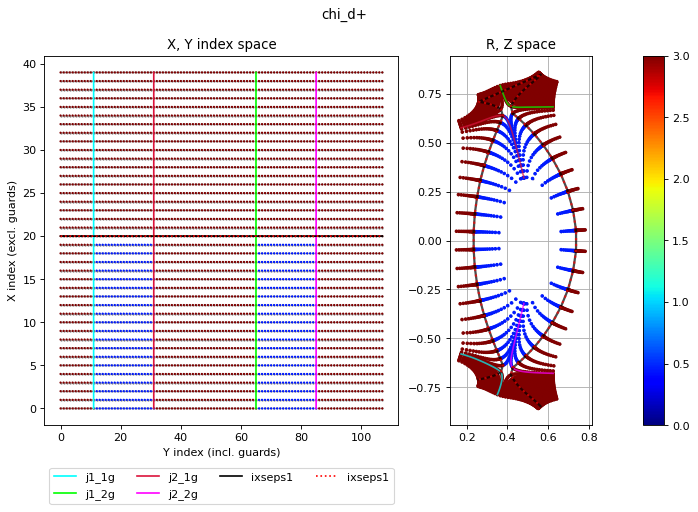

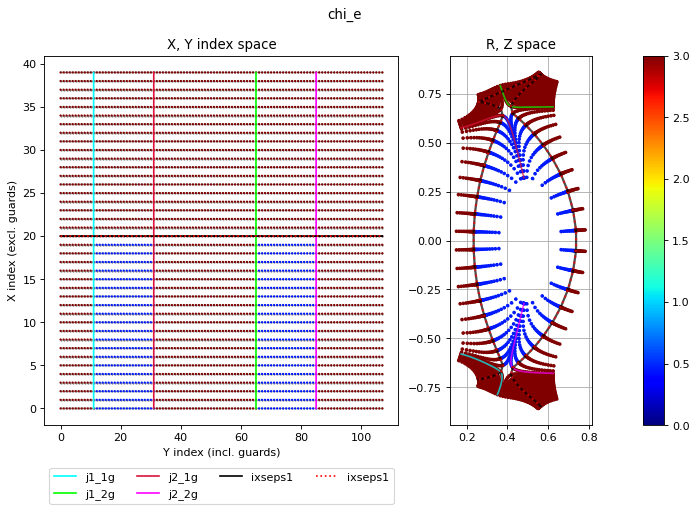

In [2]:
# close_mesh()

impose_fields(
    r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2-fatter_newhypno.nc",
    r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2f4-allsrc_Pi_fix_proper3.nc",
)

In [2]:
# close_mesh(mesh)
mesh = Mesh(r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2f1-allsrc_Pi_fix.nc")

# close_mesh(mesh)

In [ ]:
%matplotlib widget

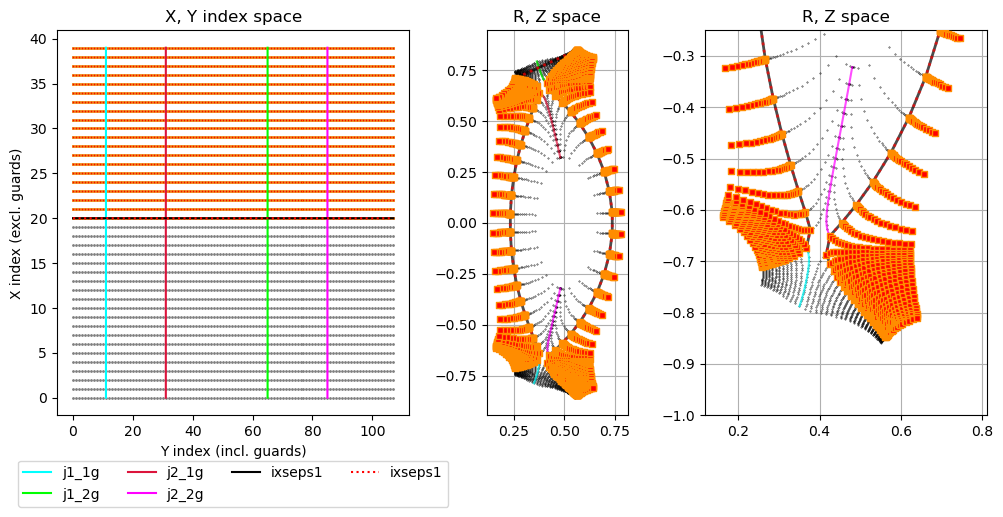

In [7]:
core_region = mesh.slices("core")
sol_region = mesh.slices("sol")

mesh.plot_slice(sol_region)

In [37]:
puff_region = mesh.slices("symmetric_puff")(width=3, center_half_gap=1)
core_edge_region = mesh.slices("core_edge")
core_region = mesh.slices("core")
sol_region = mesh.slices("sol")

fields = dict()

# Outboard D puff
Nd_src_puff = 1.2e21    # s-1
Pd_src_puff = 2/3 * 1.2e21 * 3 * constants("q_e")  #  3eV per particle (assume dissociated molecules). Remember this is pressure not energy

# Core particle/heat sources
Ni_src_core = 3e20    # s-1
Pi_src_core = 1e6 * 2/3   # W converted to pressure
Pe_src_core = 0.76e6 * 2/3   # W converted to pressure

# Anomalous diffusion coefficients
D_core = 1
chi_core = 3
D_sol = 0.1
chi_sol = 0.45


fields["Nd_src"] = Field("Nd_src", mesh)
fields["Nd_src"].set_value(puff_region, Nd_src_puff, make_per_volume = True)

fields["Pd_src"] = Field("Pd_src", mesh)
fields["Pd_src"].set_value(puff_region, Pd_src_puff, make_per_volume = True)

fields["Nd+_src"] = Field("Nd+_src", mesh)
fields["Nd+_src"].set_value(core_edge_region, Ni_src_core, make_per_volume = True)

fields["Pd+_src"] = Field("Pd+_src", mesh)
fields["Pd+_src"].set_value(core_edge_region, Pi_src_core, make_per_volume = True)

fields["Pe_src"] = Field("Pe_src", mesh)
fields["Pe_src"].set_value(core_edge_region, Pe_src_core, make_per_volume = True)

fields["D_d+"] = Field("D_d+", mesh)
fields["D_d+"].set_value(core_region, D_core, make_per_volume = False)
fields["D_d+"].set_value(sol_region, D_sol, make_per_volume = False)

fields["D_e"] = Field("D_e", mesh)
fields["D_e"].set_value(core_region, D_core, make_per_volume = False)
fields["D_e"].set_value(sol_region, D_sol, make_per_volume = False)

fields["chi_d+"] = Field("chi_d+", mesh)
fields["chi_d+"].set_value(core_region, chi_core, make_per_volume = False)
fields["chi_d+"].set_value(sol_region, chi_sol, make_per_volume = False)

fields["chi_e"] = Field("chi_e", mesh)
fields["chi_e"].set_value(core_region, chi_core, make_per_volume = False)
fields["chi_e"].set_value(sol_region, chi_sol, make_per_volume = False)

In [34]:
(fields["Nd+_src"].data * mesh.dv).sum()

BoutArray(3.e+20)

In [30]:
self = fields["Nd+_src"]
# Ni_src_core
cell_volumes = self.mesh.dv[core_edge_region]
total_volume = cell_volumes.sum()

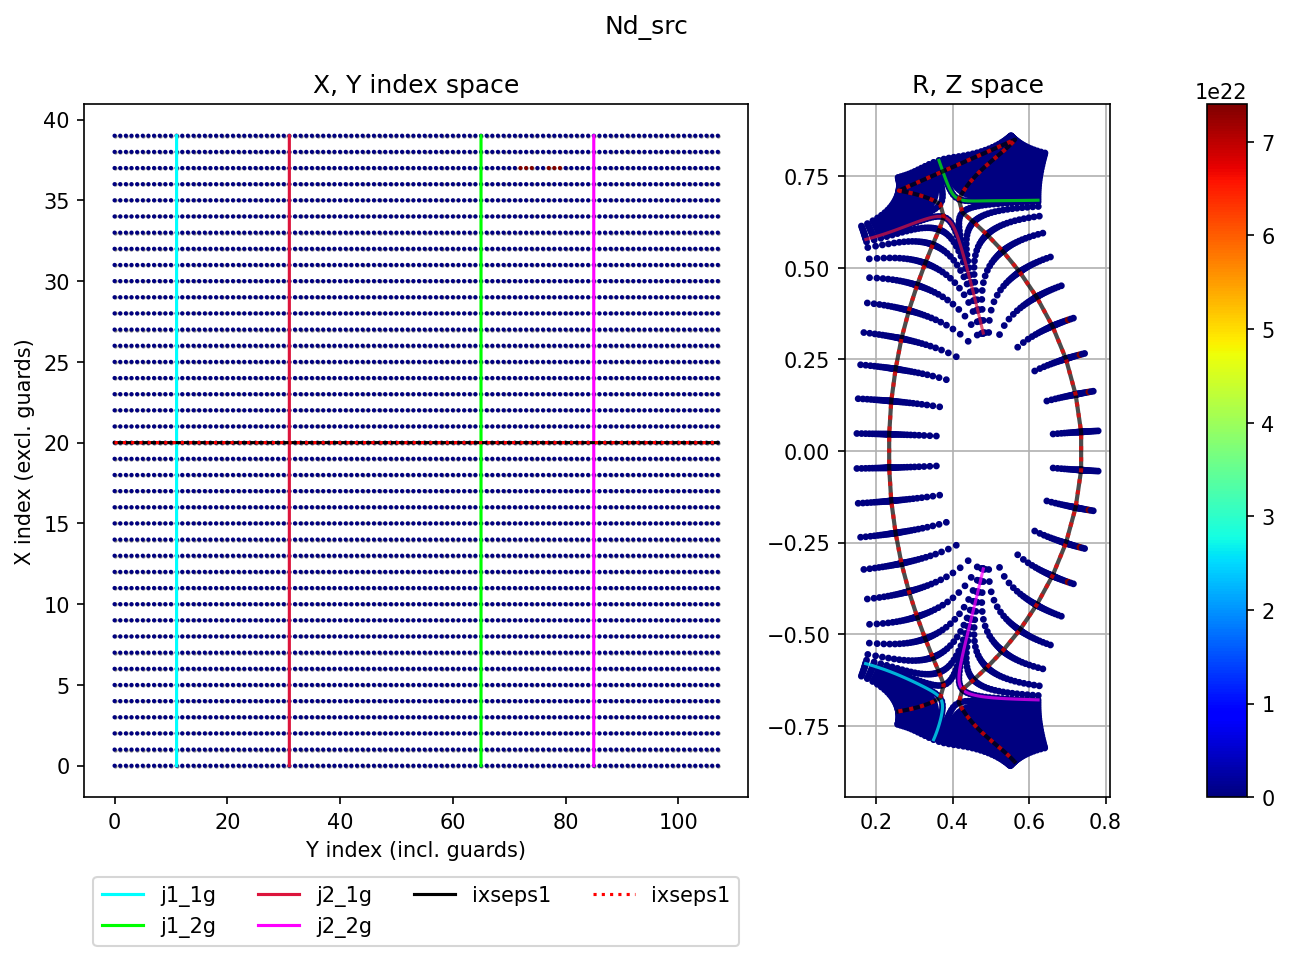

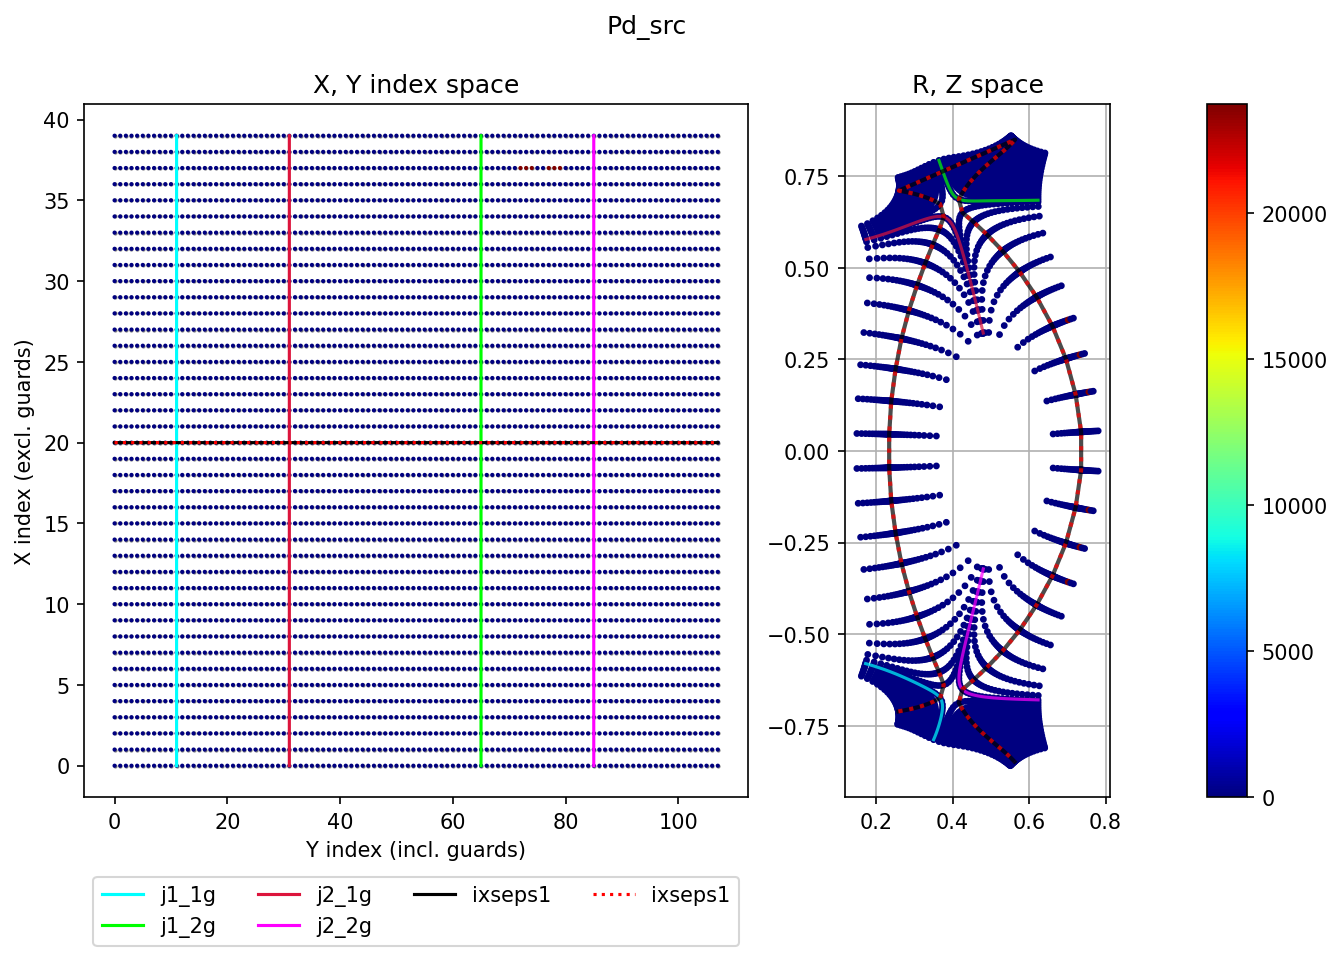

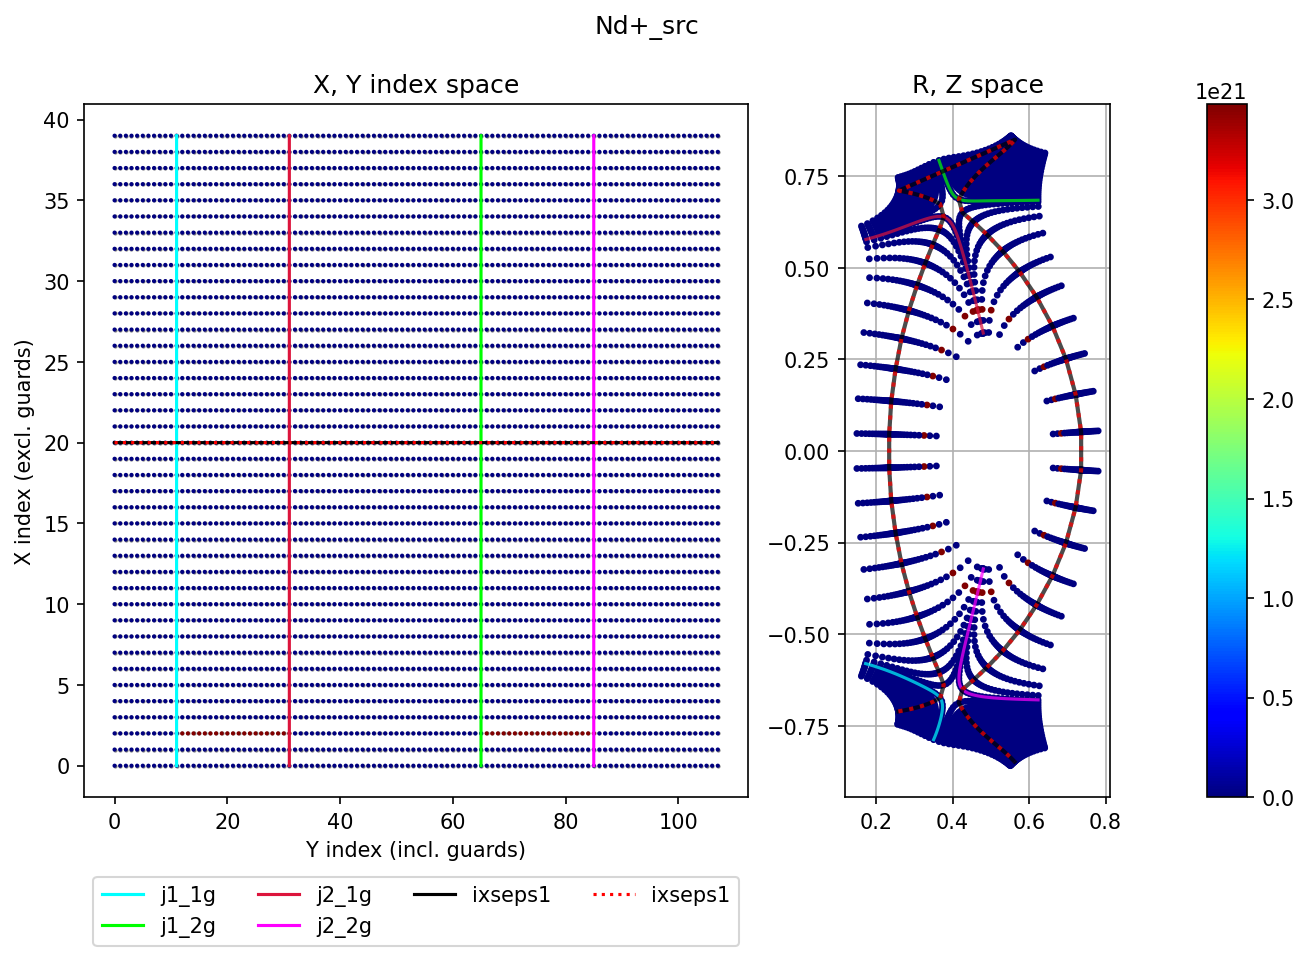

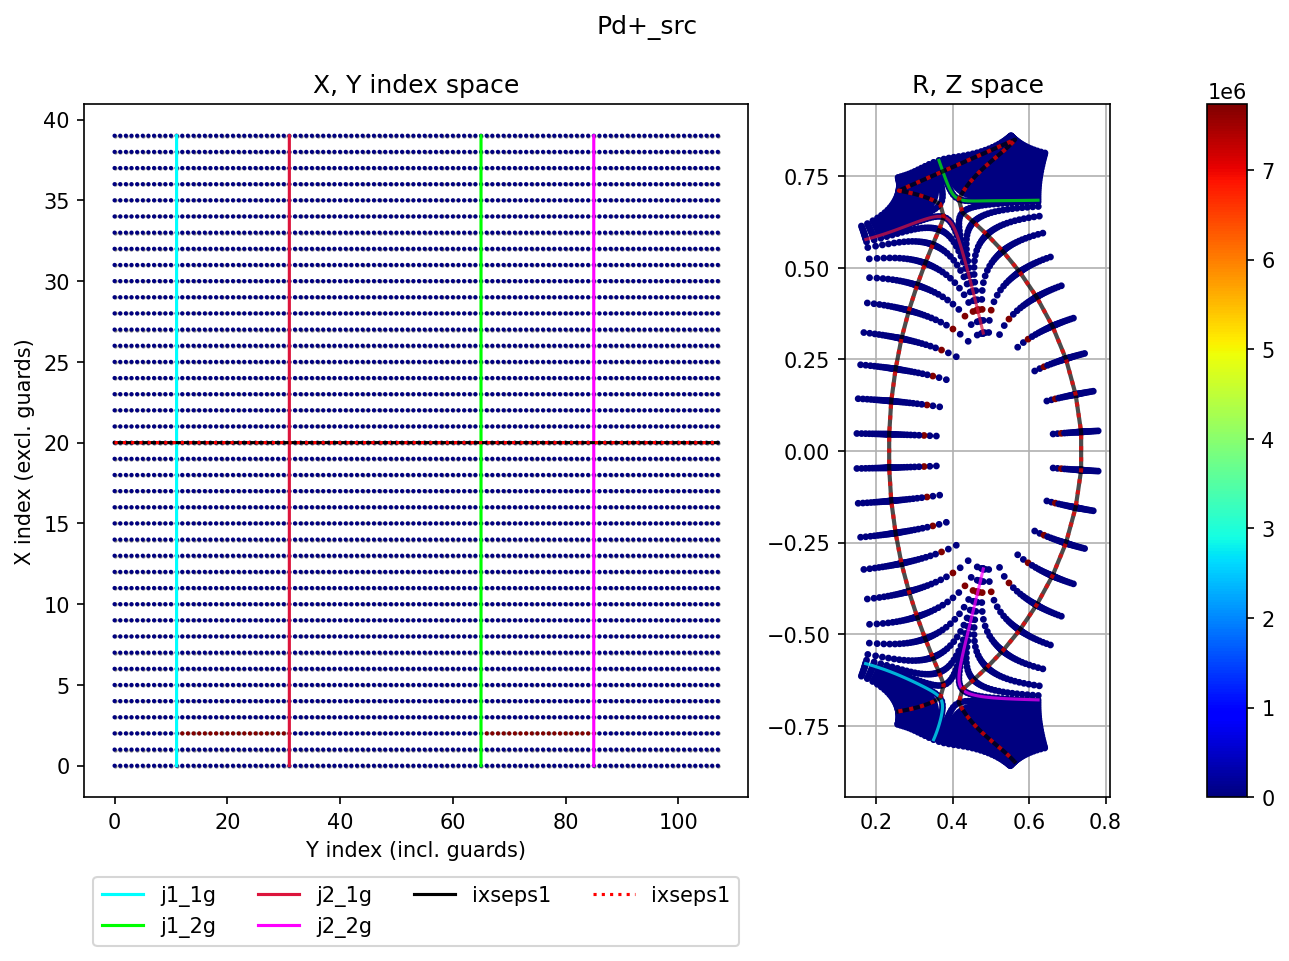

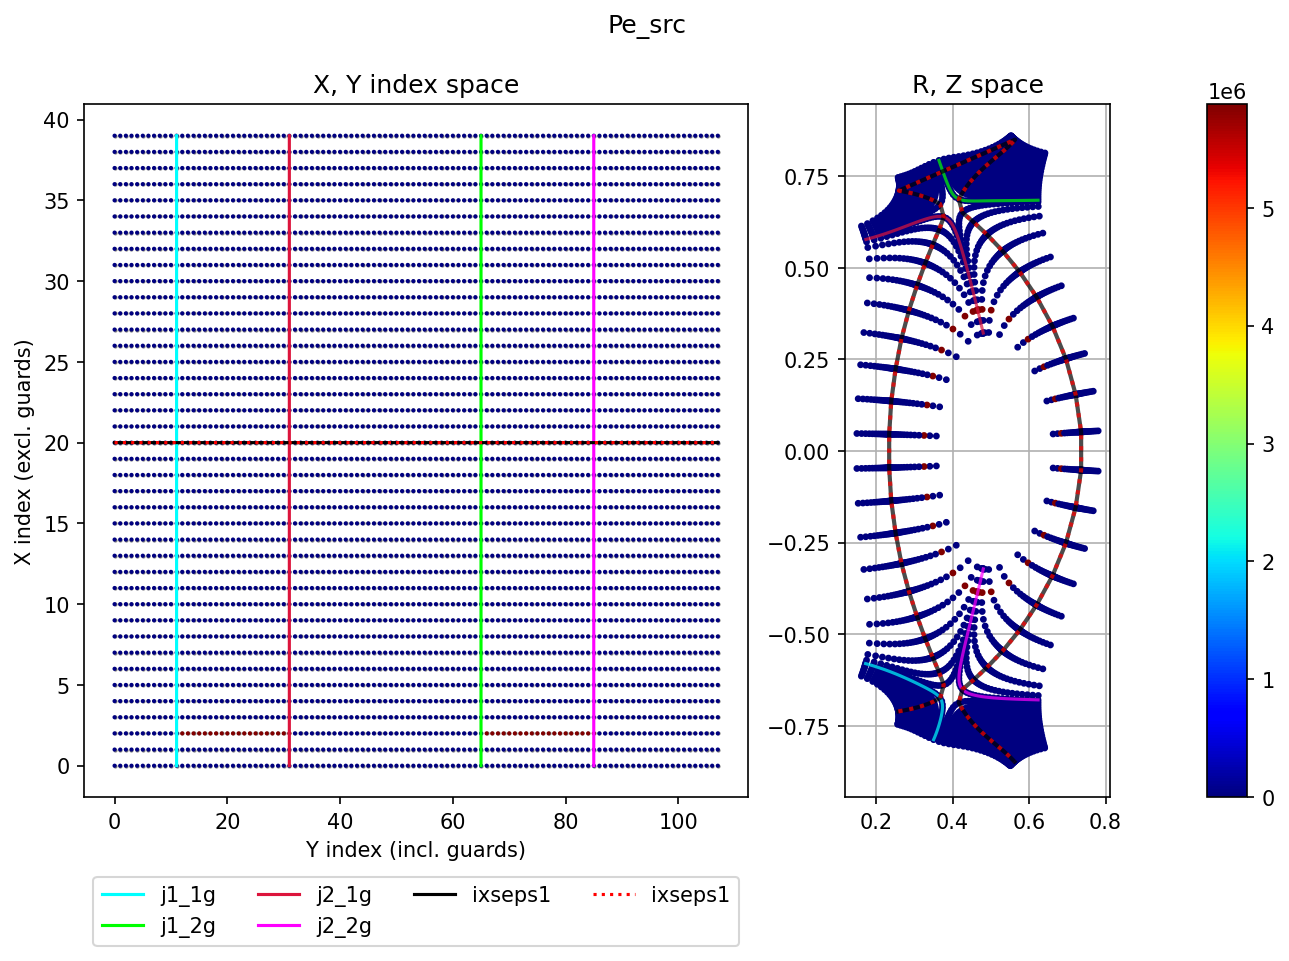

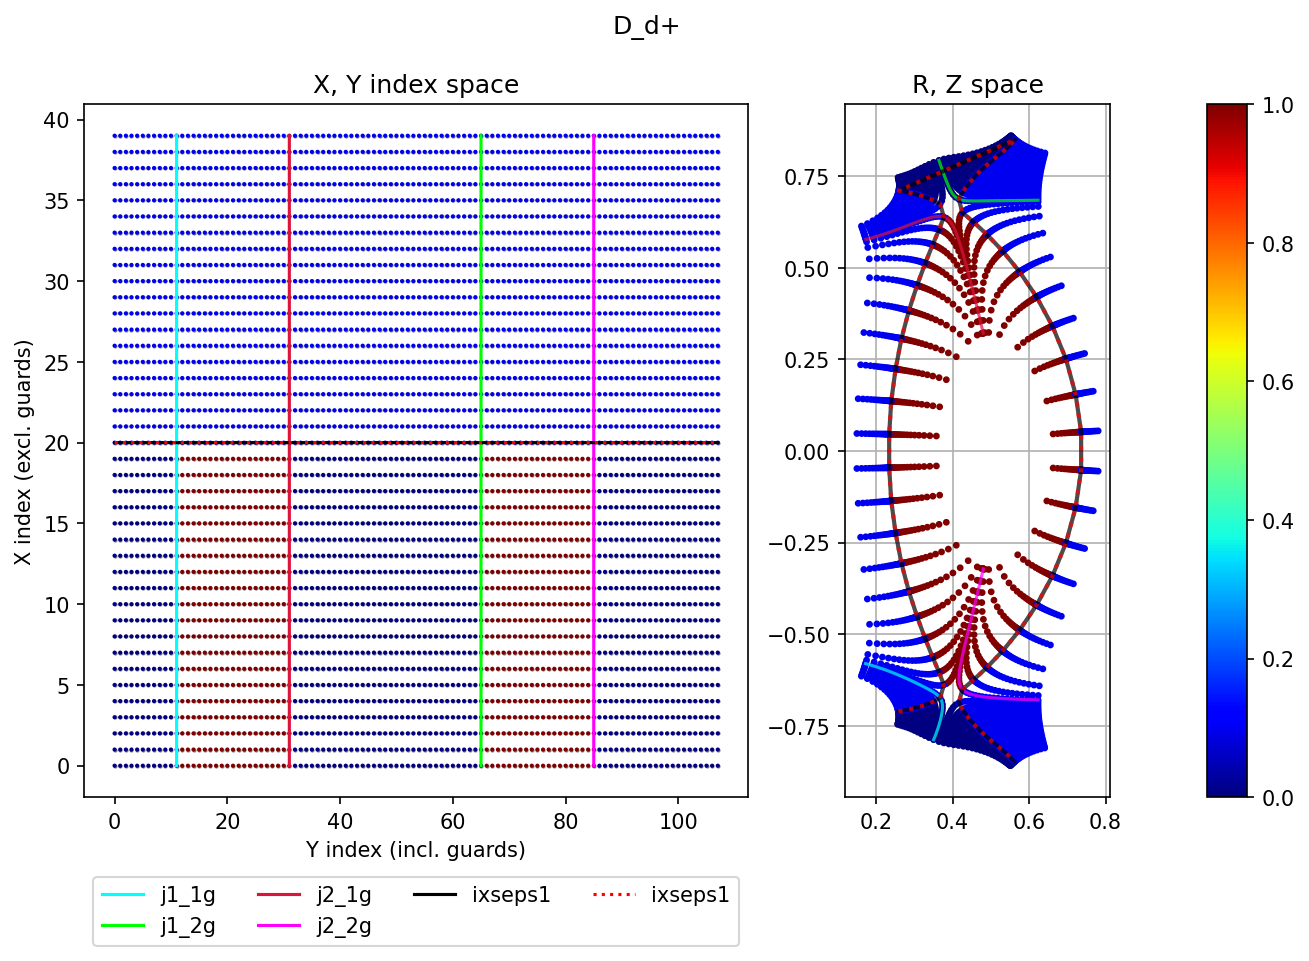

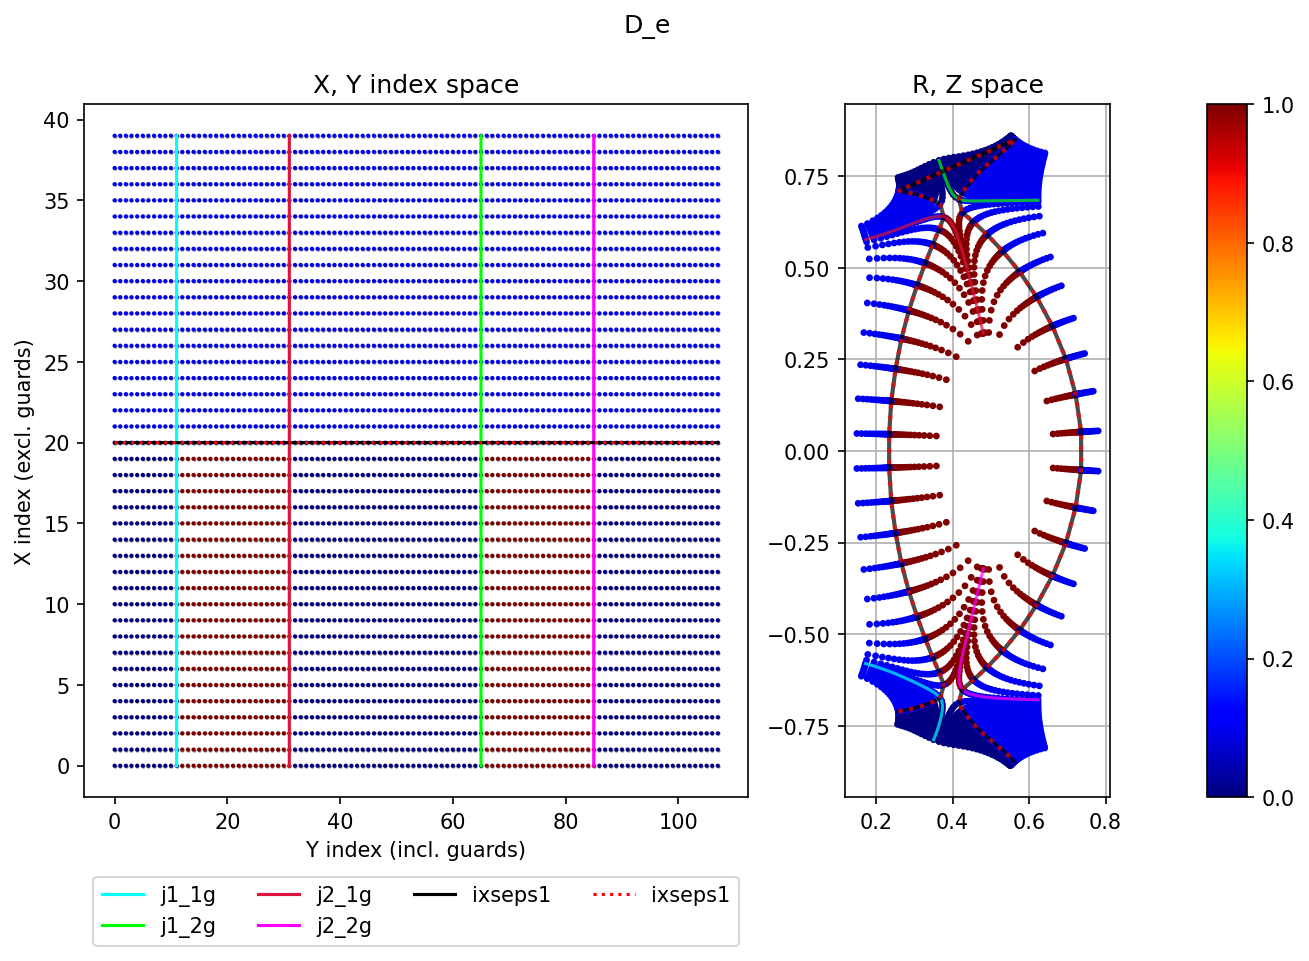

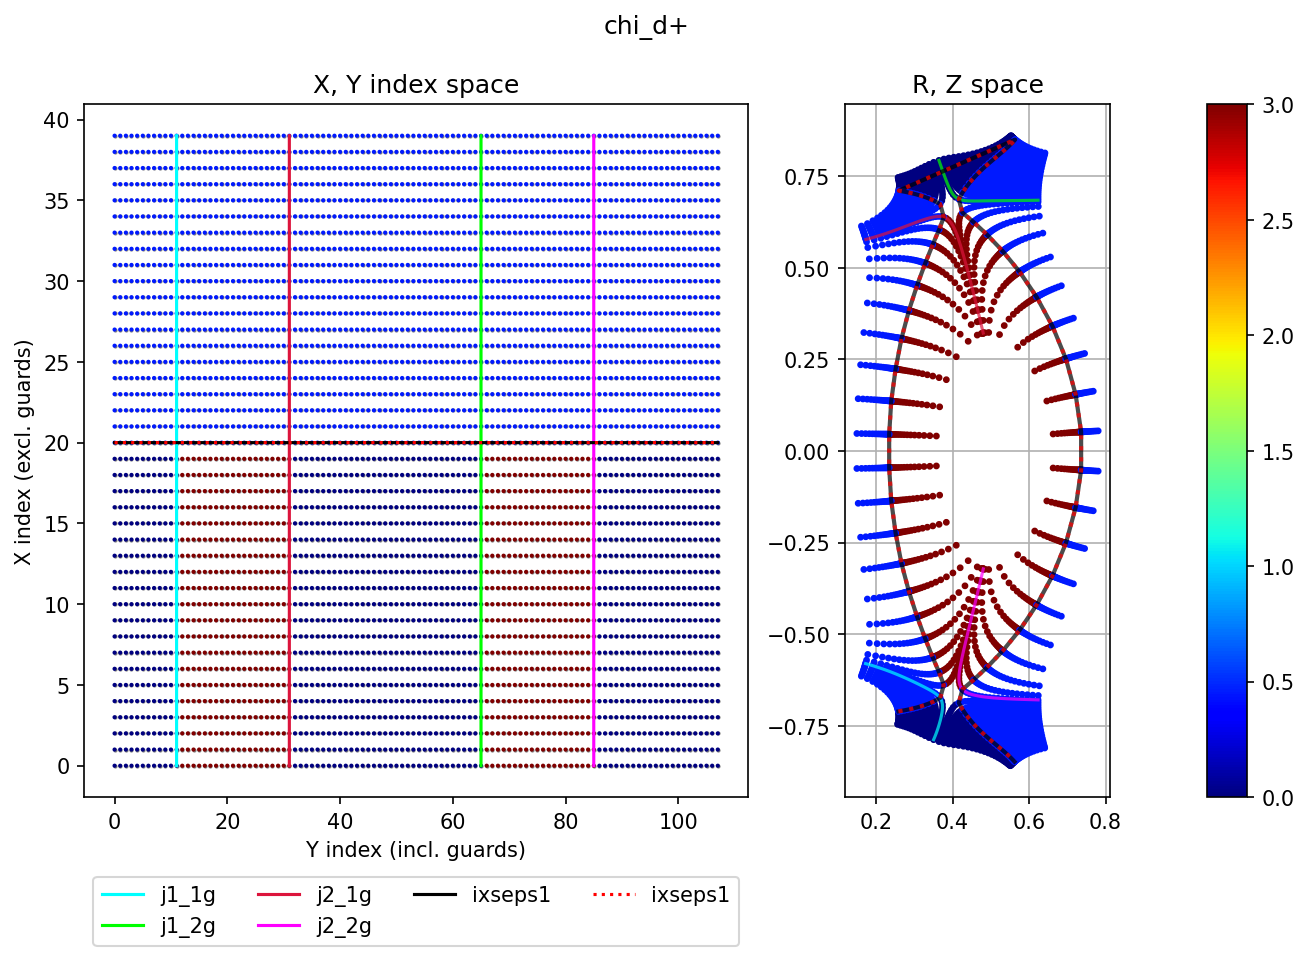

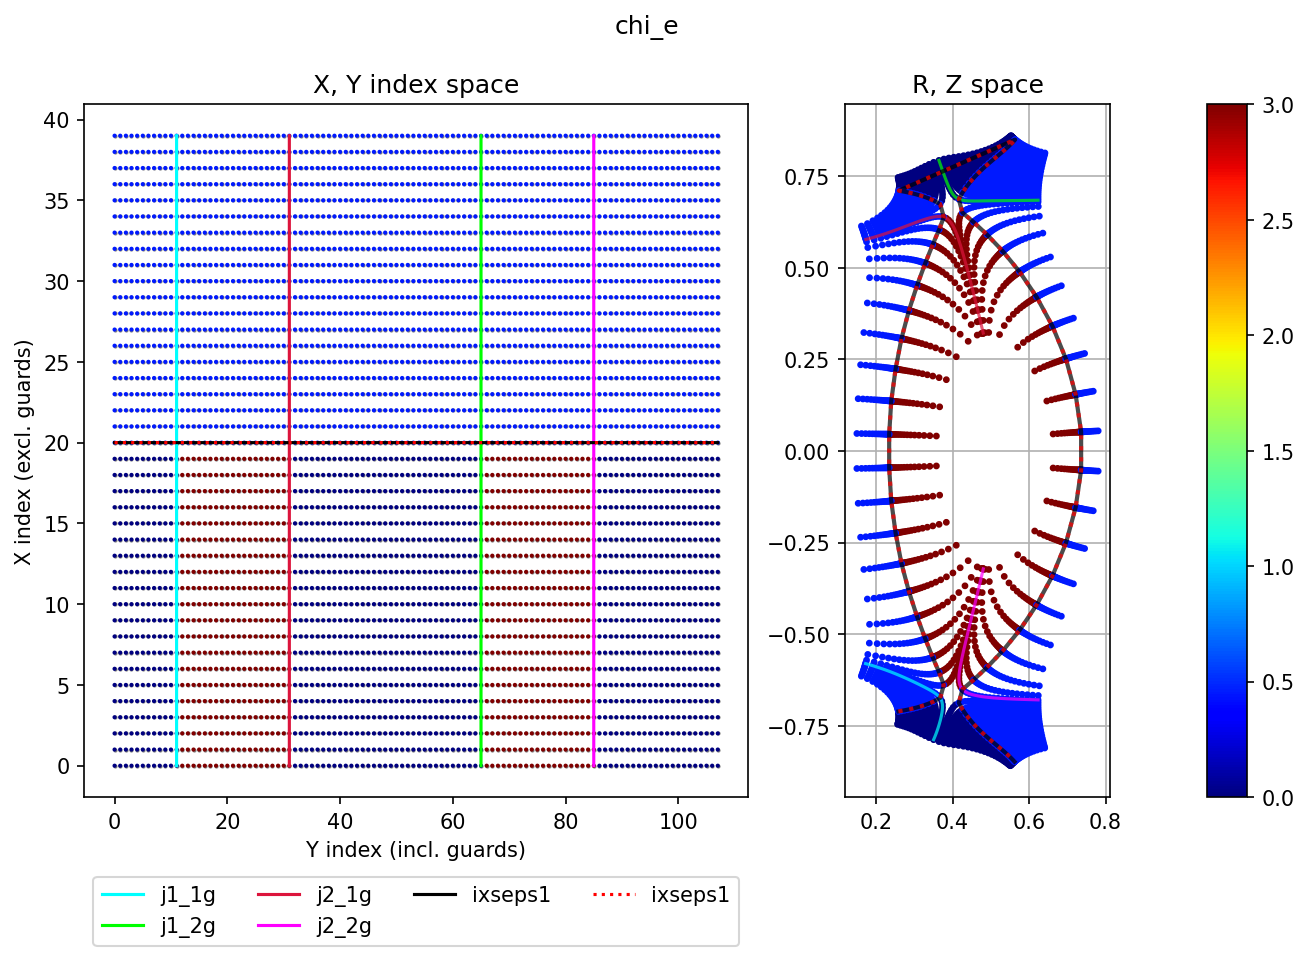

In [38]:
for field in fields.values():
    field.plot(dpi = 150)

In [17]:
try:
    mesh.close()
    del mesh
except:
    pass

source = r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b1-lores_newhypno.nc"
destination = r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b1f1-puff_1.2e21_3eV.nc"

# Create new grid from an existing one, read it in and create the Field object
shutil.copy(source, destination)
mesh = Mesh(destination)

puff_region = mesh.slices("symmetric_puff")(width=3, center_half_gap=1)

mesh.mesh["dv"] = mesh.mesh["dy"] * mesh.mesh["dx"] * mesh.mesh["J"] * 2*np.pi
volume = mesh.mesh["dv"][puff_region]

total_flow = 1.2e21   # atoms per second

total_flow_per_volume = total_flow * (volume/volume.sum()) / volume  # first find how much per cell, then per volume
print(f"Total flow: {total_flow} [s-1]")
print(f"Total flow per volume: {total_flow_per_volume.sum():.2e} [s-1 m-3]")

heat_source = 1.2e21 * 3 * constants("q_e")  #  3eV per particle (assume dissociated molecules)
heat_source_per_volume = heat_source * (volume/volume.sum()) / volume 
print(f"Total heat source: {heat_source:.2e} [W]")
print(f"Total heat source per volume: {heat_source_per_volume.sum():.2e} [W m-3]")

Pd_src = Field("Pd_src", mesh)
Nd_src = Field("Nd_src", mesh)

print()

Nd_src.data[puff_region] = total_flow_per_volume
Pd_src.data[puff_region] = heat_source_per_volume
mesh.write_field(Nd_src)
mesh.write_field(Pd_src)

try:
    mesh.close()
    del mesh
except:
    pass

Mesh file C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b1f1-puff_1.2e21_3eV.nc closed
Total flow: 1.2e+21 [s-1]
Total flow per volume: 1.79e+23 [s-1 m-3]
Total heat source: 5.77e+02 [W]
Total heat source per volume: 8.61e+04 [W m-3]

Defining dimension z of size 1
>>> Field Nd_src already exists in C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b1f1-puff_1.2e21_3eV.nc, it will be overwritten
-> Wrote field Nd_src to C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b1f1-puff_1.2e21_3eV.nc
>>> Field Pd_src already exists in C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b1f1-puff_1.2e21_3eV.nc, it will be overwritten
-> Wrote field Pd_src to C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b1f1-puff_1.2e21_3eV.nc


In [20]:
try:
    mesh.close()
    del mesh
except:
    pass

mesh = Mesh(destination)

pressure_source_per_volume = mesh.mesh["Pd_src"].squeeze()
density_source_per_volume = mesh.mesh["Nd_src"].squeeze()

dv = mesh.mesh["dy"] * mesh.mesh["dx"] * mesh.mesh["J"] * 2*np.pi

pressure_source = (pressure_source_per_volume * dv).sum()
density_source = (density_source_per_volume * dv).sum()

print(f"Total pressure source: {pressure_source:.2e} [W]")
print(f"Pressure source per volume: {pressure_source_per_volume.sum():.2e} [W m-3]")
print(f"Total density source: {density_source:.2e} [s-1]")
print(f"Density source per volume: {density_source_per_volume.sum():.2e} [s-1 m-3]")

try:
    mesh.close()
    del mesh
except:
    pass

Mesh file C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b1f1-puff_1.2e21_3eV.nc closed
Total pressure source: 5.77e+02 [W]
Pressure source per volume: 8.61e+04 [W m-3]
Total density source: 1.20e+21 [s-1]
Density source per volume: 1.79e+23 [s-1 m-3]
Mesh file C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b1f1-puff_1.2e21_3eV.nc closed
